# Central Motivation

How different are fast food places from each other? Many people swear by their favorite restaurant, but can this by justified by emprirical factors, such as nutrition facts? Is there a big difference between the fast food chains that claim specializations in certain food products, such as burger places vs. chicken places vs. "healthy" options? Our program is exploratory by nature, seeking find the differentiating nutritional factors between varying fast food chains. The applications range from helping businesses gain insight on how their menus vary from their competitors to recommending similar food items.

# Summary of Data Processing Pipeline 

Data Sources from multiple sources:

## Get Data Sources
1. From PDF converted to Xcel (BGOOD) (converted using ADOBE) --> merged


2. Webscraping 


3. CSV file of fast food nutrition facts downloaded from [OpenIntro](https://www.openintro.org/data/index.php?data=fastfood)


4. From PDF to CSV (In and Out Burger)


## Merge Data Sources
1. Merge all our data sources into one dataframe


## Clean Data
1. In the pandas DF, we need to further clean and account for missing values

# Obtain, Clean, and Merge Data Sources 

In [98]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import requests

In [99]:
def get_url(url):
    """ gets the html string of the url

    Args:
        url (str): website url

    Returns:
        html_str (str): html of website
    """
    html_str = requests.get(url).text
    
    return html_str

In [100]:
# Open Intro Menu Data
df_ff = pd.read_csv('fastfood.csv')
df_ff.drop(columns=['salad', 'calcium', 'vit_a', 'vit_c'], inplace=True)
df_ff.head()

restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  
0     11     37.0  
1     18     46.0  
2     18     70.0  
3     18     55.0  
4     18     46.0

In [101]:
# B GOOD Data
df_bgood = pd.read_csv('bgood_menu_only.csv')
df_bgood['restaurant'] = 'BGood'


df_bgood.rename(columns = {'Craft Burgers':'item', 
                           'Calories':'calories',
                           'Total Fat (g)':'total_fat',
                           'Saturated Fat (g)':'sat_fat',
                           'Trans Fat (g)':'trans_fat',
                           'Cholesterol (mg)':'cholesterol',
                           'Sodium (mg)': 'sodium',
                           'Total Carbohydrate (g)':'total_carb',
                           'Fiber (g)': 'fiber',
                           'Sugars (g)': 'sugar',
                           'Protein (g)': 'protein'}, inplace = True)

df_bgood.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 
               'Unnamed: 9', 'Unnamed: 11','Unnamed: 13', 
               'Unnamed: 14','Unnamed: 16'], axis = 1, inplace = True)

df_bgood.head()

item calories total_fat sat_fat trans_fat cholesterol sodium  \
0    The Classic      590      40.2     9.1         1          87    977   
1      West Side      550      44.6     9.9         1          58   1294   
2  The Farmhouse      720      56.1    16.9         1         130   1174   
3   The Freebird      785      52.8    15.7         0         166    991   
4     Power Play      640      47.1    16.5         1         350   1281   

  total_carb fiber sugar protein restaurant  
0         33     3     4      23      BGood  
1         45     9     9      25      BGood  
2         34     2     4      37      BGood  
3         36     3     5      43      BGood  
4         38     7     4      41      BGood

In [102]:
df_bgood_ff = pd.concat([df_bgood, df_ff])
df_bgood_ff

item calories total_fat sat_fat trans_fat  \
0                       The Classic      590      40.2     9.1         1   
1                         West Side      550      44.6     9.9         1   
2                     The Farmhouse      720      56.1    16.9         1   
3                      The Freebird      785      52.8    15.7         0   
4                        Power Play      640      47.1    16.5         1   
..                              ...      ...       ...     ...       ...   
510  Spicy Triple Double Crunchwrap      780        38      10       0.5   
511     Express Taco Salad w/ Chips      580        29       9         1   
512          Fiesta Taco Salad-Beef      780        42      10         1   
513       Fiesta Taco Salad-Chicken      720        35       7         0   
514         Fiesta Taco Salad-Steak      720        36       8         1   

    cholesterol sodium total_carb fiber sugar protein restaurant  cal_fat  
0            87    977         33     3     4      23      BGood      NaN  
1            58   1294         45     9     9      25      BGood      NaN  
2           130   1174         34     2     4      37      BGood      NaN  
3           166    991         36     3     5      43      BGood      NaN  
4           350   1281         38     7     4      41      BGood      NaN  
..          ...    ...        ...   ...   ...     ...        ...      ...  
510          50   1850         87     9     8      23  Taco Bell    340.0  
511          60   1270         59     8     7      23  Taco Bell    260.0  
512          60   1340         74    11     7      26  Taco Bell    380.0  
513          70   1260         70     8     8      32  Taco Bell    320.0  
514          55   1340         70     8     8      28  Taco Bell    320.0  

[571 rows x 13 columns]

In [103]:
# B GOOD Data
five_guys_df = pd.read_csv('five_guys.csv', 
                           names=['item','serving_size','calories', 'total_fat', 
                                  'saturated_fat', 'trans_fat', 'cholesterol', 'sodium',
                                 'total_carb', 'fiber', 'sugar', 'protein'])
five_guys_df.dropna(inplace=True)
five_guys_df = five_guys_df[1:] 
five_guys_df['restaurant'] = 'Five Guys'
five_guys_df.drop(columns='serving_size', inplace=True)
five_guys_df


item calories total_fat saturated_fat trans_fat cholesterol  \
4      Hamburger Patty      220        17             8         1          60   
5              Hot Dog      240        20             9         1          45   
7        Five Guys Bun      260         9           3.5         0           5   
9               Little      526        23             4       0.5           0   
10             Regular      953        41             7         1           0   
11               Large     1314        57            10         1           0   
13          A.1® Sauce       15         0             0         0           0   
15  Cheese*# (1 slice)       70         6             4       0.2          15   
17   Grilled Mushrooms        5         0             0         0           0   
18           Hot Sauce        0         0             0         0           0   
20             Ketchup       20         0             0         0           0   
22          Mayonnaise      100        11             2         0          10   
23             Mustard        0         0             0         0           0   
25             Pickles        3         0             0         0           0   
26              Relish       10         0             0         0           0   

   sodium total_carb fiber sugar protein restaurant  
4      50          0     0     0      16  Five Guys  
5    1040          2     0     1      11  Five Guys  
7     330         39     2     8       7  Five Guys  
9     531         72     8     2       8  Five Guys  
10    962        131    15     4      15  Five Guys  
11   1327        181    21     6      20  Five Guys  
13    280          3     0     2       0  Five Guys  
15    360          0     0     0       4  Five Guys  
17     55          1     0     1       0  Five Guys  
18    200          0     0     0       0  Five Guys  
20    160          5     0     4       0  Five Guys  
22     75          0     0     0       0  Five Guys  
23     55          0     0     0       0  Five Guys  
25    258          1     0     0       0  Five Guys  
26    105          3     0     3       0  Five Guys

In [104]:
df_all_ff = pd.concat([five_guys_df, df_bgood_ff], axis=0, ignore_index=True)

df_all_ff

item calories total_fat saturated_fat  \
0                   Hamburger Patty      220        17             8   
1                           Hot Dog      240        20             9   
2                     Five Guys Bun      260         9           3.5   
3                            Little      526        23             4   
4                           Regular      953        41             7   
..                              ...      ...       ...           ...   
581  Spicy Triple Double Crunchwrap      780        38           NaN   
582     Express Taco Salad w/ Chips      580        29           NaN   
583          Fiesta Taco Salad-Beef      780        42           NaN   
584       Fiesta Taco Salad-Chicken      720        35           NaN   
585         Fiesta Taco Salad-Steak      720        36           NaN   

    trans_fat cholesterol sodium total_carb fiber sugar protein restaurant  \
0           1          60     50          0     0     0      16  Five Guys   
1           1          45   1040          2     0     1      11  Five Guys   
2           0           5    330         39     2     8       7  Five Guys   
3         0.5           0    531         72     8     2       8  Five Guys   
4           1           0    962        131    15     4      15  Five Guys   
..        ...         ...    ...        ...   ...   ...     ...        ...   
581       0.5          50   1850         87     9     8      23  Taco Bell   
582         1          60   1270         59     8     7      23  Taco Bell   
583         1          60   1340         74    11     7      26  Taco Bell   
584         0          70   1260         70     8     8      32  Taco Bell   
585         1          55   1340         70     8     8      28  Taco Bell   

    sat_fat  cal_fat  
0       NaN      NaN  
1       NaN      NaN  
2       NaN      NaN  
3       NaN      NaN  
4       NaN      NaN  
..      ...      ...  
581      10    340.0  
582       9    260.0  
583      10    380.0  
584       7    320.0  
585       8    320.0  

[586 rows x 14 columns]

In [105]:
df_all_ff.restaurant.unique()

array(['Five Guys', 'BGood', 'Mcdonalds', 'Chick Fil-A', 'Sonic', 'Arbys',
       'Burger King', 'Dairy Queen', 'Subway', 'Taco Bell'], dtype=object)

# Visualization 

<ipython-input-8-54cfc53ca4a6>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfg = df_ff.groupby(['restaurant'])['calories','sodium','protein'].mean()


<AxesSubplot:title={'center':'Restaurant Mean Nutritional Values'}, xlabel='Restaurants', ylabel='Mean Values(g)'>

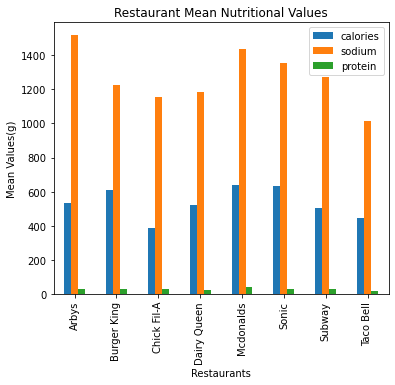

In [8]:
# Segmented Bar Chart 

df_ff = df_ff.replace(np.nan, 0)
dfg = df_ff.groupby(['restaurant'])['calories','sodium','protein'].mean()

dfg.plot(kind='bar', title='Restaurant Mean Nutritional Values', ylabel='Mean Values(g)',
         xlabel='Restaurants', figsize=(6, 5))



* The segmented barchart is a good tool to show stark differences between specific nutritional categproes on a restaurant to restaurant basis. For example, the visualization above shows that Arby's is the leader in average sodium in menu items, where as Chick-Fil-A is the leader in calorie deficit menu items. 

In [29]:
# Regression Functions 

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets mulitplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    # for each data point plot the error
    for idx, (x_i, y_i) in enumerate(zip(x, y)):
        plt.plot([x_i, x_i], [y_i, slope * x_i + intercept], 
                 ls='--', lw=3, color='tab:red',
                 label='error' if idx == 0 else "")
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.2f} * x + {intercept:.2f}, MSE = {mse:.3f}')
 

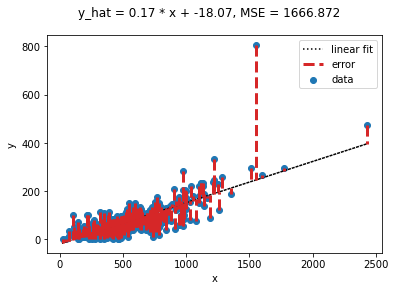

In [30]:
# Regressing between two given nutritional categories 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = df_ff['calories'].to_numpy()
y = df_ff['cholesterol']

x = x.reshape((-1, 1))

reg = LinearRegression()
reg.fit(x, y) 
slope = reg.coef_[0]
intercept = reg.intercept_

show_fit(x, y, slope, intercept)

* The scatterplot above is a foundation for running a machine learning regression based model. This chart can also be used to demonstrate levels of correlation between select nutritional categories. For instance, the chart above shows that there is a relatively high correlation between calories and cholesterol (with exception to a few outliers). 

In [24]:
y_pred = reg.predict(x) 

# computing R2 from sklearn
r2 = r2_score(y_true=y, y_pred=y_pred)
print('R2 =',r2)

R2 = 0.5813448793142899


# Discussion of Machine Learning Tools

* Machine Learning Tools: SciKit (K-nearest neighbors, K-means) and SKLearn. We believe k-nearest neighbors make the most sense because groups are already made through restaurant identification. K-means, on the other hand, is used to identify groups that are yet to exist. Another option is potentially using linear regression on certain nutritional value categories to identify correlations among groups. 


* Relevant assumptions: For k-nearest neighbors, an assumption is made that individual menu items are connected and represent a specific restaurant and can be used as an identifier for further analysis.


* Use cases: We could build a new food item recommendor based on favorite menu items and/or specifications on ranges of preferred nutritional values. Businesses could also use this tool to compare the nutritional value of their items with their competitors and modify their menus according to their strategic goals.  